In [1]:
import pandas as pd #With Pandas, you can perform operations like filtering, aggregating, merging, reshaping, and more on datasets.
import numpy as np #is a library for numerical computing in Python. It provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.
import seaborn as sns #  is a data visualization library built on top of Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics, such as heatmaps, pair plots, bar plots, etc.
import matplotlib.pyplot as plt #plt is the common alias used for pyplot. You use it to call functions like plt.plot(), plt.show(), plt.scatter(), etc., to generate visual plots (e.g., line plots, bar charts, histograms).


In [2]:
# how to call any file in jupyter ---> 1
pd.read_csv(r'C:\Users\ndhar\UScomments.csv',on_bad_lines = 'skip')

C:\Users\ndhar\AppData\Local\Temp\ipykernel_38988\2127386720.py:2: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv(r'C:\Users\ndhar\UScomments.csv',on_bad_lines = 'skip')


,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
...,...,...,...,...
691395,EoejGgUNmVU,Лучшая,1,0
691396,EoejGgUNmVU,qu'est ce que j'aimerais que tu viennes à Roan...,0,0
691397,EoejGgUNmVU,Ven a mexico! 😍 te amo LP,0,0
691398,EoejGgUNmVU,Islığı yeter...,0,0


In [3]:
comments = pd.read_csv(r'C:\Users\ndhar\UScomments.csv',on_bad_lines = 'skip',low_memory=False,)

#The read_csv function reads data from a CSV (Comma-Separated Values) file and converts it into a Pandas DataFrame—a table-like data structure with rows and columns.
#the r before the string denotes a raw string literal. This means that backslashes (\) in the file path are treated as literal characters rather than as escape characters. This is especially useful on Windows file paths.
#By setting on_bad_lines='skip', any problematic lines that cause parsing issues will be skipped (i.e., ignored) rather than causing the program to crash or throw an error.
#Setting low_memory=False tells Pandas to process the file in one go rather than in smaller chunks. This can lead to more accurate type inference but might require more memory.




In [4]:
comments.head(5) 


,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [5]:
comments.isnull().sum()


#Output: A new DataFrame of the same shape as comments where each cell is a Boolean value:
#True if the corresponding cell in comments is null (i.e., missing).
#False if the cell has a valid value.
#The .sum() method is then applied to this Boolean DataFrame. This method sums up the True values (with True equal to 1) for each column, resulting in a Series. Each value in this Series represents the number of missing values in the corresponding column of comments.

video_id         0
comment_text    26
likes            0
replies          0
dtype: int64

In [6]:
comments.dropna(inplace=True)
comments.isnull().sum()
#By default, dropna() examines each row (i.e., axis=0) and removes any row that has at least one missing value.
# The inplace=True parameter tells Pandas to modify the existing DataFrame directly, rather than returning a new DataFrame with the rows removed.

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [7]:
# how to perform sentiment analysis --> 2

In [8]:
from textblob import TextBlob
polarities = [] #An empty list named polarity is created.
for i in comments['comment_text']: #This line starts a loop over the comment_text column in the comments DataFrame.
    try:
        polarities.append(TextBlob(i).sentiment.polarity)
    except:
        polarities.append(0)
        
#the code calculates the sentiment polarity for each comment in the comment_text column of the comments DataFrame.

In [9]:
#The TextBlob library is used for natural language processing tasks, including sentiment analysis.
#This is likely meant to be TextBlob(i) (note the spelling), which creates a TextBlob object from the comment text.
#Once the TextBlob object is created, the .sentiment attribute returns a sentiment object.
# .polarity attribute of this sentiment object is a float between -1 and 1
#Inside the except Block:If any error occurs during the sentiment analysis (for example, if the text is empty or there's a processing error), the code moves to the except block.
#In this case, it appends 0 to the polarity list, assuming a neutral sentiment when processing fails.


In [10]:
#sometime date is huge then select limited data 

sample_df = comments[0:1000] 
#This part uses Python's slicing syntax on the comments DataFrame. It selects rows starting from index 0 up to, but not including, index 1000.
sample_df.shape

(1000, 4)

In [11]:
comments['sentiment']=polarities 
#What It Does: Adds a new column named 'sentiment' to the comments DataFrame and fills it with the values from the polarities list.
comments.head(20)

,video_id,comment_text,likes,replies,sentiment
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.000000
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.000000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.000000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.000000
4,XpVt6Z1Gjjo,trending 😉,3,0,0.000000
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,0.000000
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0,0.000000
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0,0.000000
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0,0.800000
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0,-0.135714


In [12]:
filter1 = comments['sentiment']==1

In [13]:
comments[filter1]

,video_id,comment_text,likes,replies,sentiment
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0
...,...,...,...,...,...
691373,EoejGgUNmVU,Perfect. Every version,0,0,1.0
691383,EoejGgUNmVU,Me encantaaaaa <3,0,0,1.0
691388,EoejGgUNmVU,Best song ever 🤘,0,0,1.0
691389,EoejGgUNmVU,excellent performance,0,0,1.0


In [14]:
#how to do emoji analysis ---> 3 

In [15]:
import emoji

In [16]:
emoji_list = []  # 1. Initialize an empty list to store emojis.

# 2. Loop over each comment in the 'comment_text' column of the DataFrame 'comments'.
for comment in comments['comment_text']:
    # 3. Loop over every character in the current comment.
    for char in comment:
        if char in emoji.EMOJI_DATA:
            emoji_list.append(char)


In [17]:
emoji_list[0:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

In [18]:
from collections import Counter
#The Counter class is a specialized dictionary designed to count hashable objects. It makes it easy to count how many times each element appears in a collection, such as a list.
Counter(emoji_list).most_common(30)
#This method is called on the Counter object. The most_common(10) method returns a list of the 10 most frequent elements in the Counter, along with their counts.


[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147),
 ('♥', 4909),
 ('😊', 3596),
 ('🏻', 3438),
 ('💜', 3429),
 ('😬', 3381),
 ('👌', 3112),
 ('💙', 2831),
 ('😢', 2672),
 ('🏼', 2549),
 ('🤣', 2279),
 ('🙌', 2233),
 ('😁', 2220),
 ('💗', 2144),
 ('😱', 2094),
 ('🙏', 1818),
 ('🌍', 1810),
 ('😀', 1734),
 ('💛', 1677),
 ('🏽', 1593),
 ('🤔', 1592)]

In [19]:
#collection of entire data --> 4

In [20]:
import os
#Once imported, you have access to a wide range of functions and variables that allow you to interact with the operating system. Some common functionalities include:
os.listdir(r'C:\Users\ndhar\additional_data')#List files and directories in a given directory.

['.ipynb_checkpoints',
 'CAvideos.csv',
 'CA_category_id.json',
 'DEvideos.csv',
 'DE_category_id.json',
 'filtered_data.xlsx',
 'FRvideos.csv',
 'FR_category_id.json',
 'GBvideos.csv',
 'GB_category_id.json',
 'INvideos.csv',
 'IN_category_id.json',
 'JPvideos.csv',
 'JP_category_id.json',
 'KRvideos.csv',
 'KR_category_id.json',
 'MXvideos.csv',
 'MX_category_id.json',
 'RUvideos.csv',
 'RU_category_id.json',
 'USvideos.csv',
 'US_category_id.json']

In [21]:
files = os.listdir(r'C:\Users\ndhar\additional_data')

In [22]:
files_csv = [file for file in files if '.csv' in file ]

In [23]:
files_csv

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

In [24]:
import warnings #The first line imports the entire warnings module.
from warnings import filterwarnings #The second line imports the filterwarnings function from the warnings module.
filterwarnings('ignore')
# This can be useful during development or in production when you want to hide non-critical warnings, but be cautious—suppressing warnings might cause you to miss important alerts about deprecated features or other issues.


In [25]:
#what is pseudocode? --> 5

In [26]:
full_df= pd.DataFrame() #This creates an empty Pandas DataFrame named full_df.
#You plan to use this DataFrame to accumulate data from multiple CSV files. Each file's data will be added (concatenated) to this DataFrame.
path = r'C:\Users\ndhar\additional_data'
#This line sets the variable path to the directory where your CSV files are stored.
for file in files_csv:#files_csv is assumed to be a list of CSV file names (for example, ['data1.csv', 'data2.csv', ...]).
    current_df = pd.read_csv(path+'/'+file, encoding ='iso-8859-1',on_bad_lines = 'skip')
    full_df = pd.concat([full_df,current_df],ignore_index=True)
#pd.read_csv(...) reads the CSV file into a new DataFrame called current_df.
#The full path for each CSV file is built by concatenating path, a forward slash '/', and the file name stored in file.


In [27]:
full_df.shape

(375942, 16)

In [28]:
full_df[full_df.duplicated()].shape
#

(36417, 16)

In [29]:
full_df= full_df.drop_duplicates()

In [30]:
full_df.shape

(339525, 16)

In [31]:
#How to tranform your file into other format --> 6

In [68]:
full_df.head(4)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,like-rate,dislike-rate,comment_rate,like_rate,dislike_rate
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,...,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music,4.589104,0.253051,0.733639,4.589104,0.253051
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,...,False,False,False,STill got a lot of packages. Probably will las...,Comedy,12.594873,0.166363,1.284185,12.594873,0.166363
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,...,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy,4.575843,0.167292,0.256342,4.575843,0.167292
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,...,False,False,False,I know it's been a while since we did this sho...,Entertainment,6.309630,0.094903,0.835851,6.309630,0.094903


In [33]:
full_df['category_id'].unique()

array([10, 23, 24, 25, 22, 26,  1, 28, 20, 17, 29, 15, 19,  2, 27, 43, 30,
       44])

In [34]:
like_counts = full_df.groupby('category_id')['likes'].sum()

In [35]:
print(like_counts)

category_id
1      437611281
2       43537811
10    5867826278
15      47230769
17     330258769
19      12389403
20     251765515
22     583368312
23     931444449
24    2377832055
25     142013256
26     306753785
27     105055435
28     203111636
29      83561212
30        435777
43       3630978
44           198
Name: likes, dtype: int64


In [36]:
json_df= pd.read_json(r'C:\Users\ndhar\additional_data\US_category_id.json')
json_df['items'][0]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [37]:
cat_dict = {}
for item in json_df['items'].values:
    cat_dict[int(item['id'])]=item ['snippet']['title']

In [38]:
cat_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [39]:
full_df['category_name']=full_df['category_id'].map(cat_dict)
#It applies a mapping to each element in the Series using the provided dictionary cat_dict. For each value in 'category_id', it looks up the corresponding value (or label) in cat_dict

In [40]:
full_df.head(1)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music


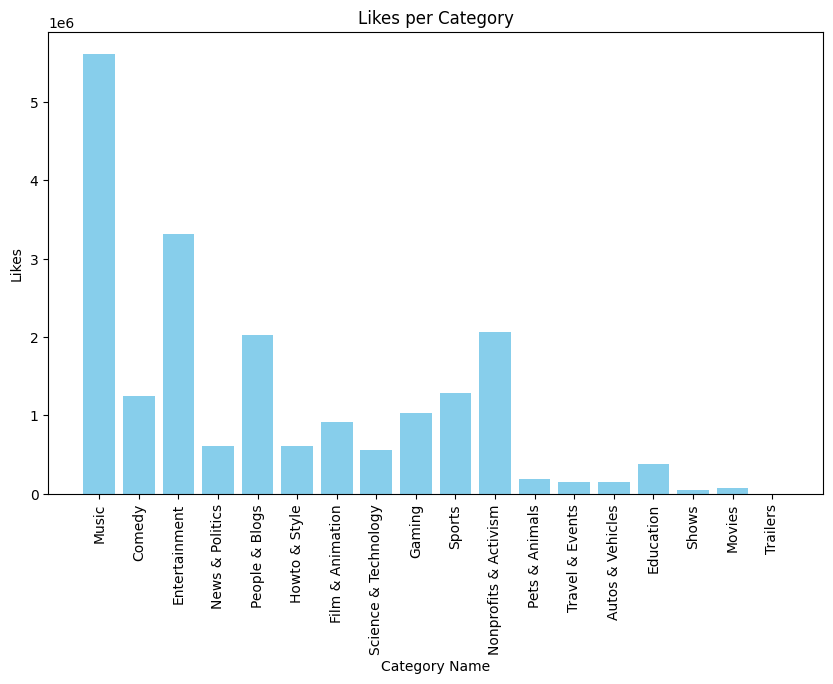

In [41]:
# First, define your x and y variables
x = full_df['category_name']
y = full_df['likes']

# Create a figure and plot a bar graph
plt.figure(figsize=(10,6))
plt.bar(x, y, color='skyblue')
plt.xticks(rotation='vertical')

# If you also want to plot a line graph on top of it (optional)
#plt.plot(x, y, color='red')  # You can adjust or remove this line as needed

plt.xlabel("Category Name")
plt.ylabel("Likes")
plt.title("Likes per Category")
#plt.tight_layout()
plt.show()


In [50]:
#find out  whether audience is engaged or not ?
full_df['like_rate']=(full_df['likes']/full_df['views'])*100
full_df['dislike_rate']=(full_df['dislikes']/full_df['views'])*100
full_df['comment_rate']=(full_df['comment_count']/full_df['views'])*100
#It takes the number of likes (from the 'likes' column) and divides it by the number of views (from the 'views' column) for each row. Multiplying by 100 converts the result into a percentage, giving you the "like rate" for each entry.

In [51]:
full_df.columns #It helps you verify that the new columns ('like_rate', 'dislike_rate', and 'comment_rate') have been added correctly.
full_df[['views','likes','dislikes']].corr()

,views,likes,dislikes
views,1.000000,0.779531,0.405428
likes,0.779531,1.000000,0.451809
dislikes,0.405428,0.451809,1.000000


<Axes: >

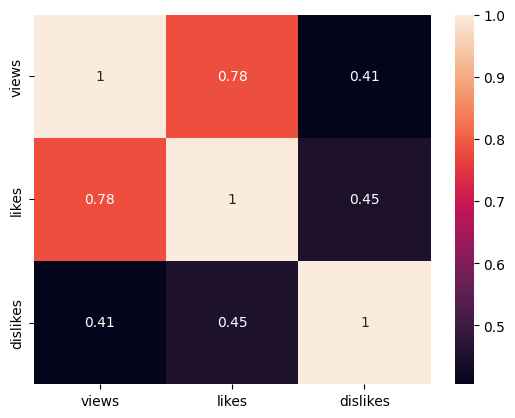

In [52]:
sns.heatmap(full_df[['views','likes','dislikes']].corr(),annot=True)
#This parameter tells Seaborn to annotate each cell in the heatmap with the numeric value of the correlation coefficient. This makes it easier to see the exact values in addition to the color gradient.

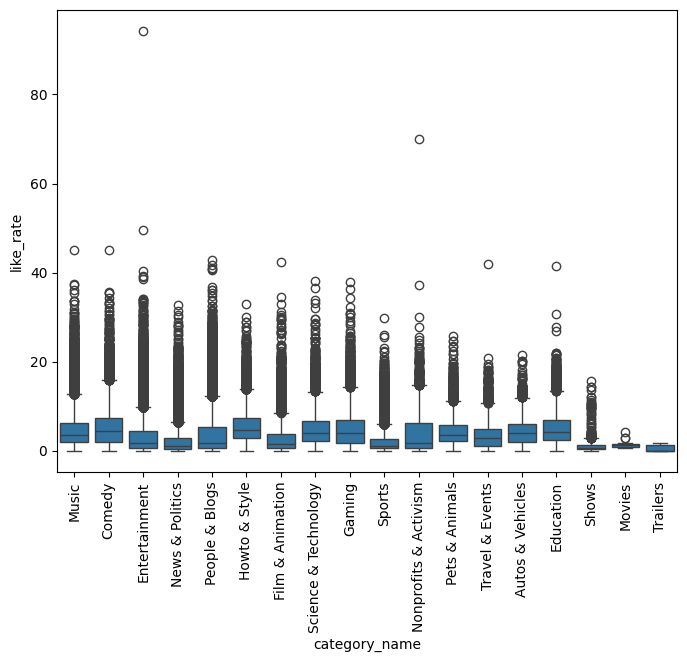

In [54]:
plt.figure(figsize=(8,6))
sns.boxplot(x='category_name',y='like_rate',data=full_df)
plt.xticks(rotation='vertical')
plt.show()

In [70]:
full_df['channel_title'].value_counts()
#this code tells us that wwe appears 643 times , jimmy kimmel live appears 528 times ertc etc 

channel_title
The Late Show with Stephen Colbert    710
WWE                                   643
Late Night with Seth Meyers           592
TheEllenShow                          555
Jimmy Kimmel Live                     528
                                     ... 
æµ·å¤ã®åå¿ï¼ LOVE JAPAN           1
ã­ãã¦ãé
ä¿¡å¢                   1
ãã£ã³ãã« T.M                     1
FBas                                    1
Owen Harvey                             1
Name: count, Length: 37824, dtype: int64

In [62]:
unique_count = len(full_df['channel_title'].unique())
#You can simply get the count of unique values by using the len() function:
print(unique_count)

37824


In [63]:
unique_count = full_df['channel_title'].nunique()
#Pandas Series has a built-in method called .nunique() which directly returns the number of unique element
print(unique_count)

37824


In [71]:
cdf=full_df.groupby(['channel_title']).size().sort_values(ascending = False).reset_index()
#full_df.groupby(['channel_title']):
#-->This groups the DataFrame full_df by the values in the channel_title column.
#-->All rows with the same channel_title will be grouped together.
#.size():
#-->After grouping, .size() counts the number of rows in each group.
#-->This gives the number of times each channel_title appears in the DataFrame.
#.sort_values(ascending=False):
#-->ascending=False means the most frequent channel will be at the top.
#reset_index() converts this Series into a DataFrame:

In [83]:
 cdf

,channel_title,total_vedios
0,The Late Show with Stephen Colbert,710
1,WWE,643
2,Late Night with Seth Meyers,592
3,TheEllenShow,555
4,Jimmy Kimmel Live,528
...,...,...
37819,Juste Pour Jouer,1
37820,JusteJo,1
37821,Justie,1
37822,#kaneki ken,1


In [84]:
cdf.rename(columns = {0:'total_vedios'},inplace = True)

In [ ]:
'''
cdf: Your original DataFrame.
.sort_values(by='total_vedios', ascending=False): This is a Pandas function used to sort the rows of the DataFrame based on the values in the total_vedios column.
by='total_vedios': Specifies the column to sort by.
ascending=False: Sorts the values in descending order (highest to lowest).
If you set ascending=True, it would sort in ascending order (lowest to highest).
cdf_sorted: The new DataFrame that contains the same data as cdf but sorted by total_vedios.
'''

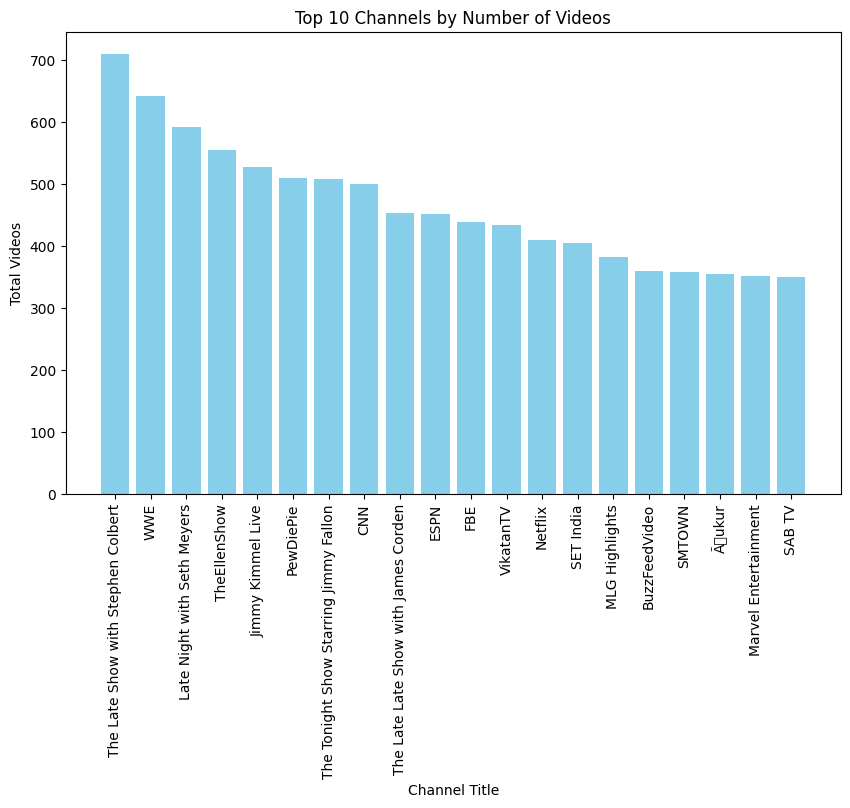

In [88]:
# Sorting the DataFrame by 'total_vedios' in descending order
cdf_sorted = cdf.sort_values(by='total_vedios', ascending=False)

# Selecting the top 10 rows
top_10_cdf = cdf_sorted.head(20)

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(top_10_cdf['channel_title'], top_10_cdf['total_vedios'], color='skyblue')
plt.xticks(rotation='vertical')
plt.xlabel('Channel Title')
plt.ylabel('Total Videos')
plt.title('Top 10 Channels by Number of Videos')
plt.show()


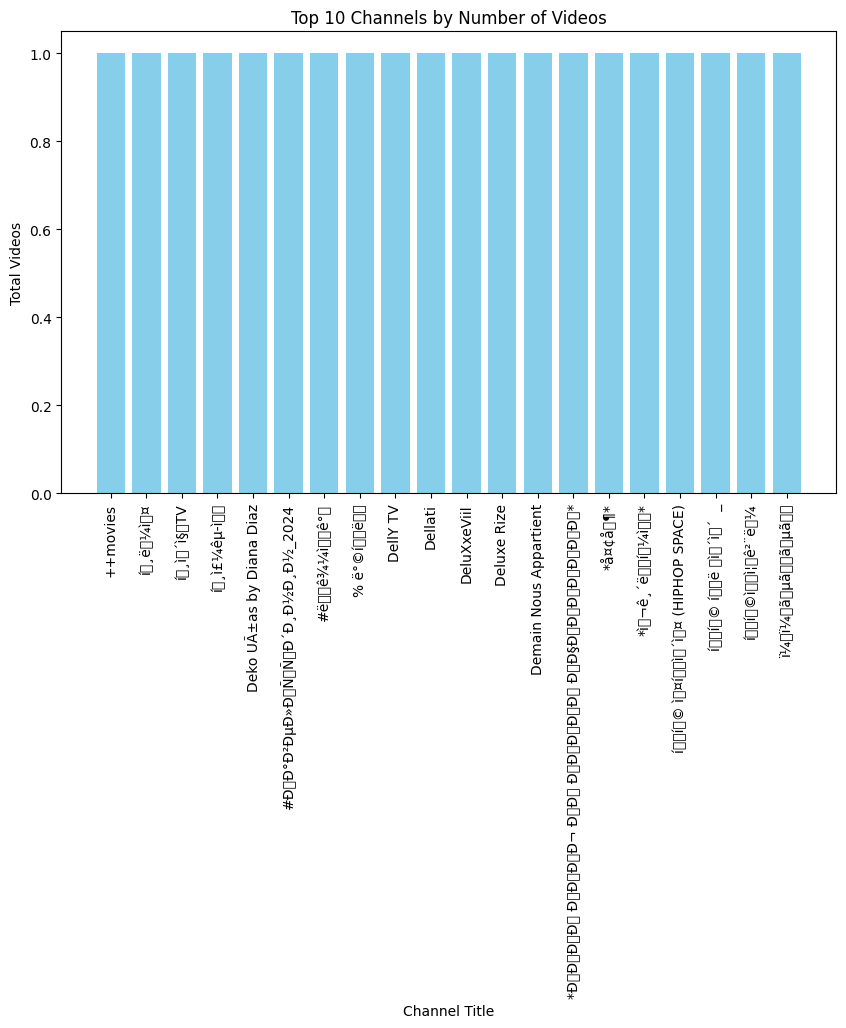

In [89]:
# Sorting the DataFrame by 'total_vedios' in descending order
cdf_sorted = cdf.sort_values(by='total_vedios', ascending=True)

# Selecting the top 10 rows
top_10_cdf = cdf_sorted.head(20)

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(top_10_cdf['channel_title'], top_10_cdf['total_vedios'], color='skyblue')
plt.xticks(rotation='vertical')
plt.xlabel('Channel Title')
plt.ylabel('Total Videos')
plt.title('Top 10 Channels by Number of Videos')
plt.show()